In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('nps.csv', parse_dates=['event_date'])

In [3]:
df.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


In [4]:
#catagorize customer score feedback
def categorize(score):
    if score >= 0  and score <=6:
        return 'Detractor'
    elif score == 7 or score == 8:
        return 'Passive'
    elif score == 9 or score == 10:
        return 'Promoter'

In [5]:
year = df['event_date'].dt.year
month = df['event_date'].dt.month
print(year, month)

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
3321    2020
3322    2020
3323    2020
3324    2020
3325    2020
Name: event_date, Length: 3326, dtype: int64 0        1
1        1
2        1
3        1
4        1
        ..
3321    12
3322    12
3323    12
3324    12
3325    12
Name: event_date, Length: 3326, dtype: int64


In [6]:
df['yearmonth'] = 100*year + month
df['category'] = df['score'].apply(categorize)

In [7]:
# Net Promoter Score 'NPS'
nps = df.pivot_table(index='yearmonth', columns='category',aggfunc='size')
nps

category,Detractor,Passive,Promoter
yearmonth,,,
202001,31,82,215
202002,22,90,161
202003,33,72,125
202004,36,87,178
202005,33,83,191
202006,32,80,215
202007,48,95,258
202008,40,103,256
202009,18,68,135


In [8]:
nps['total_responses'] = nps.sum(axis=1)
nps['total_responses']

yearmonth
202001    328
202002    273
202003    230
202004    301
202005    307
202006    327
202007    401
202008    399
202009    221
202010    296
202011    117
202012    126
Name: total_responses, dtype: int64

In [9]:
nps['nps'] = (nps['Promoter']-nps['Detractor'])/nps['total_responses']
nps['nps'] = (100*nps['nps']).astype(int)
nps

category,Detractor,Passive,Promoter,total_responses,nps
yearmonth,,,,,
202001,31,82,215,328,56
202002,22,90,161,273,50
202003,33,72,125,230,40
202004,36,87,178,301,47
202005,33,83,191,307,51
202006,32,80,215,327,55
202007,48,95,258,401,52
202008,40,103,256,399,54
202009,18,68,135,221,52


Text(0.5, 0, '')

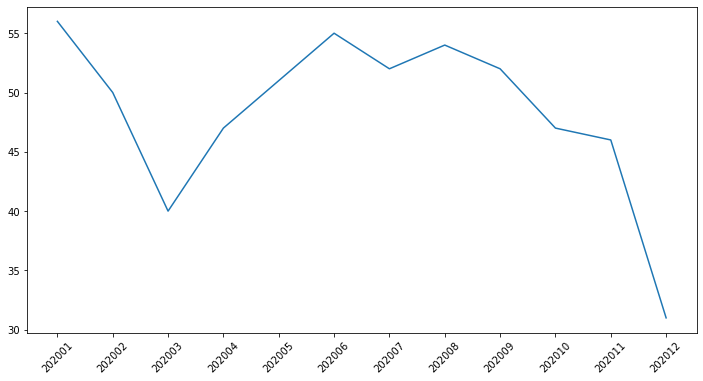

In [10]:
ax = nps.reset_index().plot(kind="line", x="yearmonth",y="nps",
                            figsize=(12,6), legend=False
                           )
ax.set_xticks(nps.index)
ax.set_xticklabels(nps.index, rotation=45)
ax.axes.get_xaxis().set_label_text("")

In [11]:
subs = pd.read_csv('muscle_labs.csv', parse_dates=['end_date','start_date'])
subs

,id,customer_id,end_date,start_date,subscription_period,price
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500
...,...,...,...,...,...,...
10492,18069,12456,2015-01-20 13:54:39,2014-09-19 00:38:00,monthly,50
10493,18068,12457,2015-01-20 13:38:29,2014-10-19 00:23:00,monthly,50
10494,319,12458,2015-01-20 10:16:19,2014-11-18 21:09:16,monthly,50
10495,343,12460,2015-01-20 18:50:56,2014-11-19 05:50:32,monthly,50


In [12]:
year = subs['end_date'].dt.year
month = subs['end_date'].dt.month
subs['churn_month'] = 100*year + month
subs['churn_month']

0        201412
1        201411
2        201411
3        201412
4        201511
          ...  
10492    201501
10493    201501
10494    201501
10495    201501
10496    201501
Name: churn_month, Length: 10497, dtype: int64

In [13]:
monthly_churn = pd.DataFrame({'total_churned':subs.groupby('churn_month').size()})
monthly_churn.head()

,total_churned
churn_month,
201103,8
201104,16
201105,29
201106,27
201107,37


In [14]:
years = list(range(2011,2015))
years

[2011, 2012, 2013, 2014]

In [15]:
months = list(range(1,13))

In [19]:
yearmonths = [y*100+m for y in years for m in months]
yearmonths = yearmonths[:-1]

In [20]:
churn = pd.DataFrame({'yearmonths':yearmonths})

In [21]:
churn = churn.merge(monthly_churn,how='left' , left_on='yearmonths', right_index=True)
churn.head()

,yearmonths,total_churned
0,201101,NaN
1,201102,NaN
2,201103,8.0
3,201104,16.0
4,201105,29.0


In [22]:
churn.fillna(0,inplace=True)
churn['total_churned'] = churn['total_churned'].astype(int)

In [23]:
import datetime as dt

In [24]:
def get_customers(yearmonth):
    year = yearmonth//100
    month = yearmonth-year*100
    date = dt.datetime(year, month, 1)
    return ((subs['start_date']<date) & (date<=subs['end_date'])).sum()
    

In [26]:
churn['total_customers'] = churn['yearmonths'].apply(get_customers)
churn['total_customers']

0        0
1       17
2       47
3       82
4      105
5      155
6      194
7      220
8      247
9      254
10     273
11     341
12     299
13     334
14     384
15     437
16     427
17     480
18     515
19     538
20     546
21     591
22     586
23     607
24     634
25     752
26     775
27     869
28     882
29    1018
30    1063
31    1111
32    1142
33    1221
34    1314
35    1412
36    1598
37    2004
38    2426
39    2809
40    3385
41    3751
42    4150
43    4521
44    5038
45    5599
46    6290
Name: total_customers, dtype: int64

In [28]:
churn['churn_rate'] = churn['total_churned']/churn['total_customers']
churn['churn_rate'].head()

0         NaN
1    0.000000
2    0.170213
3    0.195122
4    0.276190
Name: churn_rate, dtype: float64

In [ ]:
churn['yearmonth'] = churn['yearmonths'].astype(str)
arange = __import__("numpy").arange
Ellipse = __import__("matplotlib").patches.Ellipse
ax = churn.plot(x="yearmonth", y="churn_rate", figsize=(12,6), rot=45, marker=".")
start, end = ax.get_xlim()
ax.get_xticks()
ax.set_xticks(arange(2, end, 3))
ax.set_xticklabels(yearmonths[2::3])
circle = Ellipse((35, churn.loc[churn.yearmonth == "201312", "churn_rate"].iloc[0]),
                 5, 0.065, color='sandybrown', fill=False
                   )
ax.add_artist(circle)
ax.xaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_legend().remove()